<img src="./logo_UNSAM.jpg" align="right" width="150" />  -->

#### Análisis y procesamiento de señales

# Trabajo Práctico Nº3
#### Santiago Manuel Corral

## Introducción

Para esta tercera entrega se modelo un conversor analógico a digital (ADC). Teniendo en cuenta, el ruido analógico de entrada de una señal real, y el rudio de cuantización determinada por la cantidad de bits del ADC, como podemos ver en el siguiente esquema: 
<img src="./DiagramaADC.png" align="center" width="650" />

*Puntos clave:* 

Definimos $f_s$ como nuestra frecuencia de muestreo (cantidad de muestras por segundo), para evitar distorciones procuramos que la frecuencia de muestreo sea al menos el doble de nuestra frecuencia natural $f_0$ de la señal original.
Luego definimos la resolución espectral como $\Delta f = \frac{f_s}{N}$ donde $N$ representa el numero total de muestras tomadas para la señal. Esta resolución indica que tan finos son los intervalos de frecuencia en el espectro de la señal. Veamos que cuantas más muestras tomamos, más grande es N, y mejor sera nuestra resolución.

<u>Cuantización:</u>

La cuantización es la conversión de una señal analógica en una señal digital mediante discretizacion. En este proceso estan involucrados la cantidad de bits de nuestro ADC $B$, y el rango de voltaje del ADC $V_f$. $$ q = \frac{V_f}{2^{B-1}} $$ siendo $q$ el paso de cuantización. Veamos que a mayor cantidad de bits, menor sera nuestro paso de cuantización por lo que menor sera el nivel de ruido de cuantización, esto es algo que corroboraremos en el desarrollo del trabajo. Definimos a este ruido de cuantización como la diferencia entre la señal analogica original y la señal cuantificada: $$X_R(n) = X_R(t) + n_q(n)$$

La potencia de una señal aleatoria se define como el valor medio al cuadrado: $$P = E[x^2] $$ Como suponemos un ADC ideal con un ruido de cuantización de media 0, entonces: $$ \sigma^2 = Var(x) = E[x^2] = P $$
Como el error de cuantización en un ADC sigue una distribución uniforme entre $[\frac{-q}{2};\frac{q}{2}] $ entonces $$ \sigma^2 = Var(x) = \frac{q^2}{12} $$

<u>Normalización:</u>

Se suele normalizar la señal para evitar la saturación del ADC, evitando el clippeo. Esto se consigue dividiendo la señal por su desvio estandar: $$ X_n(t) = \frac{x(t)}{\sigma} $$ Por lo que ahora la varianza de nuestra nueva señal es igual a 1, entonces: $$ P_x = \sigma^2 = 1$$
Debido a que el ruido de cuantización es aleatorio y no esta relacionado directamente con la señal de entrada, al ser modelada esta puede ser tratada como una componente de ruido adicional. Podemos expresar la potencia de la señal $X(n)$ entonces como: $$ P_xn = P_x + P_{n_q} $$ siendo $P_x$ la potencia de la señal original y $P_{n_q}$ la potencia del ruido de cuantizacion. Definimos la relación señal-ruido (SNR) entonces como el cociente entre estas ultimas dos.

Por ultimo, para realizar el analisis espectral utilizamos la transformada rapida de Fourier (FFT). Esta nos permite estudiar como varía las componentes de frecuencia de la señal en el tiempo. En el espectro, podemos ver como se distribuye la potencia de la señal. 

## Experimentación con conversor ADC, 4 Bits y $K_n$ = 1

Modulos y funciones iniciales:

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def mi_funcion_sen (vmax, dc, ff, ph, N, fs):
    #fs frecuencia de muestreo (Hz)
    #N cantidad de muestras
    
    ts = 1/fs # tiempo de muestreo o periodo
    tt=np.linspace (0, (N-1)*ts, N) #vector de tiempo
    
    #generacion de la señal senoidal
    xx= dc + vmax*np.sin(2*np.pi*ff*tt + ph)
    #la señal debe generarse con la formula: x(t)=DC+Vmax*sen(2pift+fase)
    
    return tt, xx

Datos de la simulación:

In [33]:
#Datos para el sampleo
fs =  1000 # frecuencia de muestreo (Hz)
N = 1000 # cantidad de muestras
# con 1000 para cada una normalizamos la resolucion espectral

# Datos del ADC
B = 4 # bits 
Vf = 2 # rango simétrico de +/- Vf Volts 
q = 2*Vf/(2**B)# paso de cuantización de q Volts

# datos del ruido (potencia de la señal normalizada, es decir 1 W)
pot_ruido_cuant = (q**2)/12 # Watts 
kn = 1. # escala de la potencia de ruido analógico
pot_ruido_analog = pot_ruido_cuant * kn 

ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

In [34]:
tt, xx = mi_funcion_sen(2, 0, 1, 0, N, fs)

##normalizar para que la potencia sea 1
##con desvio estandar:
xn = xx/np.std(xx) #varianza unitaria con potencia = 12


Generación de ruido:

In [35]:
nn=np.random.normal(0,np.sqrt(pot_ruido_analog),N) #señal de ruido analogico

analog_sig = xn # señal analógica sin ruido

sr = xn+nn # señal analógica de entrada al ADC (con ruido analógico)

srq = np.round(sr/q)*q# señal cuantizada, (señal divida la cantidad total de bits)

nq =  srq-sr# señal de ruido de cuantización

Generación de resultados:

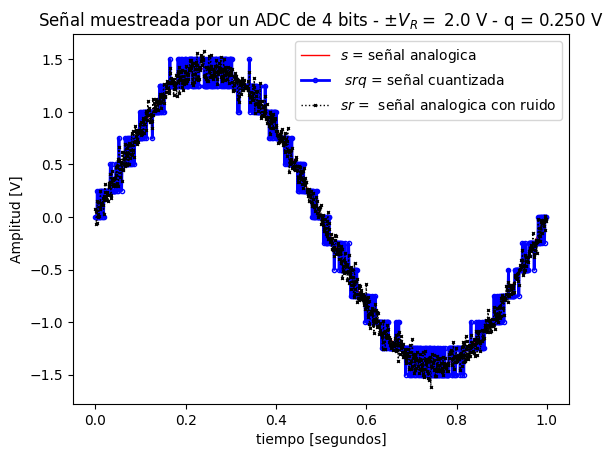

<Figure size 640x480 with 0 Axes>

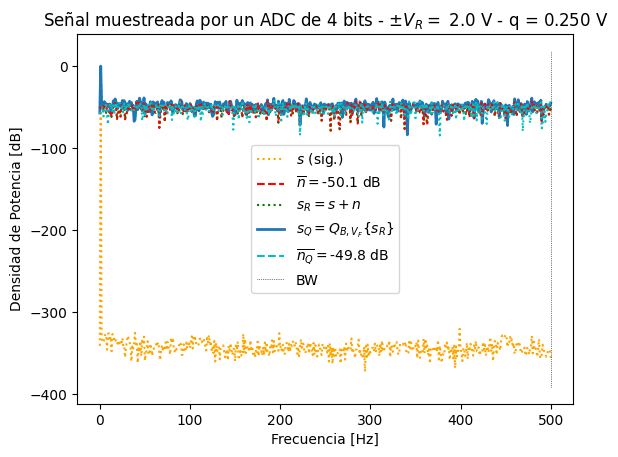

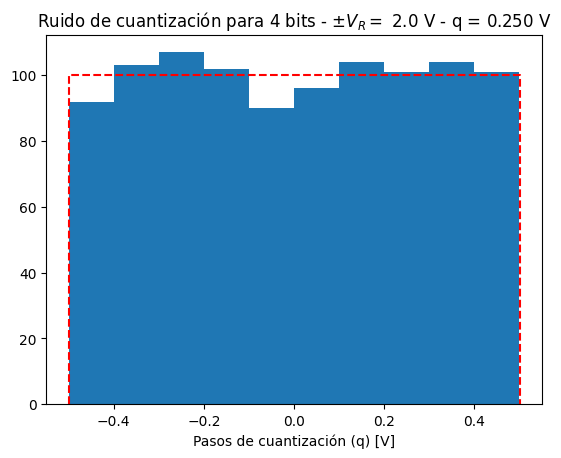

In [36]:
#############
# señal temporal
#############

plt.figure(1)

#Grafico de la señal sin ruido
plt.plot(tt, analog_sig, lw=1,linestyle='-', color ="red", label='$ s $ = señal analogica' )
# Gráfico de señal cuantizada con ruido
plt.plot(tt, srq, lw=2, linestyle='-', color='blue', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label=' $ srq $ = señal cuantizada')
# Gráfico de señal analógica con ruido
plt.plot(tt, sr, lw=1, color='black', marker='x', linestyle='dotted', markersize=2, markerfacecolor='red', markeredgecolor='black', fillstyle='none', label='$ sr $ =  señal analogica con ruido')

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

###########
# Espectro
###########
plt.figure(2)
ft_SR = 1/N*np.fft.fft( sr)
ft_Srq = 1/N*np.fft.fft( srq)
ft_As = 1/N*np.fft.fft( analog_sig)
ft_Nq = 1/N*np.fft.fft( nq)
ft_Nn = 1/N*np.fft.fft( nn)

# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)

bfrec = ff <= fs/2

Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

plt.figure(10)

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$ s $ (sig.)' ) #El puntero se usa para quedarnos con la mitad del vector (por paridad no necesitamos mas)
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 0.5  )

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()

#############
# Histograma
#############

plt.figure(3)
bins = 10
plt.hist(nq.flatten()/(q), bins=bins)
plt.plot( np.array([-1/2, -1/2, 1/2, 1/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))
plt.xlabel('Pasos de cuantización (q) [V]');

## Analisis de las siguientes configuraciónes del ADC: 

$B = 4 bits$ $K_n = \frac{1}{10}$

$B = 16 bits$ $K_n = {10}$

#### $B = 4 bits$ $K_n = \frac{1}{10}$
Datos de la simulación :

In [37]:
#Datos para el sampleo
fs =  1000 # frecuencia de muestreo (Hz)
N = 1000 # cantidad de muestras
# con 1000 para cada una normalizamos la resolucion espectral

# Datos del ADC
B = 4 # bits 
Vf = 2 # rango simétrico de +/- Vf Volts 
q = 2*Vf/(2**B)# paso de cuantización de q Volts

# datos del ruido (potencia de la señal normalizada, es decir 1 W)
pot_ruido_cuant = (q**2)/12 # Watts 
kn = 1/10 # escala de la potencia de ruido analógico
pot_ruido_analog = pot_ruido_cuant * kn 

ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

In [38]:
tt, xx = mi_funcion_sen(2, 0, 1, 0, N, fs)

##normalizar para que la potencia sea 1
##con desvio estandar:
xn = xx/np.std(xx) #varianza unitaria con potencia = 12


Generación de ruido:

In [39]:
nn=np.random.normal(0,np.sqrt(pot_ruido_analog),N) #señal de ruido analogico

analog_sig = xn # señal analógica sin ruido

sr = xn+nn # señal analógica de entrada al ADC (con ruido analógico)

srq = np.round(sr/q)*q# señal cuantizada, (señal divida la cantidad total de bits)

nq =  srq-sr# señal de ruido de cuantización

Generación de resultados:

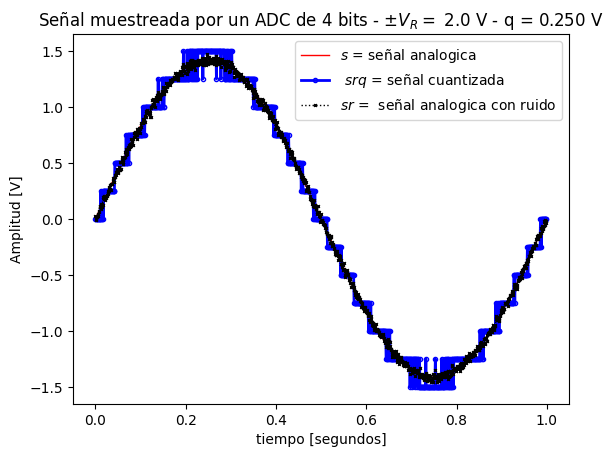

<Figure size 640x480 with 0 Axes>

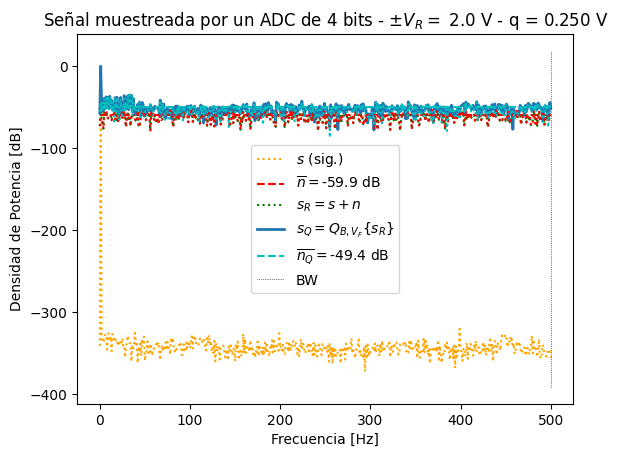

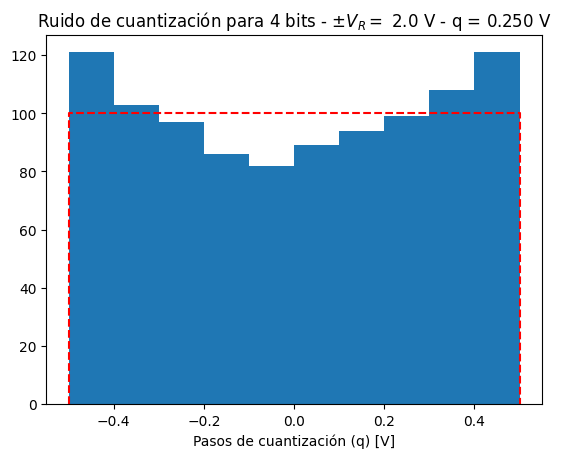

In [40]:
#############
# señal temporal
#############

plt.figure(1)

#Grafico de la señal sin ruido
plt.plot(tt, analog_sig, lw=1,linestyle='-', color ="red", label='$ s $ = señal analogica' )
# Gráfico de señal cuantizada con ruido
plt.plot(tt, srq, lw=2, linestyle='-', color='blue', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label=' $ srq $ = señal cuantizada')
# Gráfico de señal analógica con ruido
plt.plot(tt, sr, lw=1, color='black', marker='x', linestyle='dotted', markersize=2, markerfacecolor='red', markeredgecolor='black', fillstyle='none', label='$ sr $ =  señal analogica con ruido')

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

###########
# Espectro
###########
plt.figure(2)
ft_SR = 1/N*np.fft.fft( sr)
ft_Srq = 1/N*np.fft.fft( srq)
ft_As = 1/N*np.fft.fft( analog_sig)
ft_Nq = 1/N*np.fft.fft( nq)
ft_Nn = 1/N*np.fft.fft( nn)

# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)

bfrec = ff <= fs/2

Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

plt.figure(10)

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$ s $ (sig.)' ) #El puntero se usa para quedarnos con la mitad del vector (por paridad no necesitamos mas)
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 0.5  )

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()

#############
# Histograma
#############

plt.figure(3)
bins = 10
plt.hist(nq.flatten()/(q), bins=bins)
plt.plot( np.array([-1/2, -1/2, 1/2, 1/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))
plt.xlabel('Pasos de cuantización (q) [V]');

#### $B = 16 bits$ $K_n = {10}$

Datos de la simulación:

In [41]:
#Datos para el sampleo
fs =  1000 # frecuencia de muestreo (Hz)
N = 1000 # cantidad de muestras
# con 1000 para cada una normalizamos la resolucion espectral

# Datos del ADC
B = 16 # bits 
Vf = 2 # rango simétrico de +/- Vf Volts 
q = 2*Vf/(2**B)# paso de cuantización de q Volts

# datos del ruido (potencia de la señal normalizada, es decir 1 W)
pot_ruido_cuant = (q**2)/12 # Watts 
kn = 10 # escala de la potencia de ruido analógico
pot_ruido_analog = pot_ruido_cuant * kn 

ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

In [42]:
tt, xx = mi_funcion_sen(2, 0, 1, 0, N, fs)

##normalizar para que la potencia sea 1
##con desvio estandar:
xn = xx/np.std(xx) #varianza unitaria con potencia = 12


Generación de ruido:

In [43]:
nn=np.random.normal(0,np.sqrt(pot_ruido_analog),N) #señal de ruido analogico

analog_sig = xn # señal analógica sin ruido

sr = xn+nn # señal analógica de entrada al ADC (con ruido analógico)

srq = np.round(sr/q)*q# señal cuantizada, (señal divida la cantidad total de bits)

nq =  srq-sr# señal de ruido de cuantización

Generación de resultados:

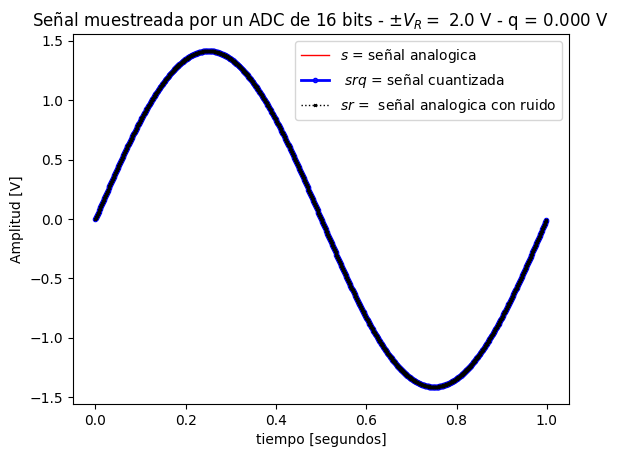

<Figure size 640x480 with 0 Axes>

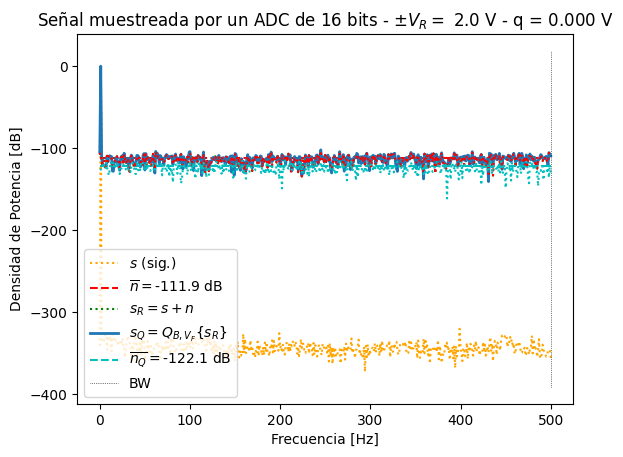

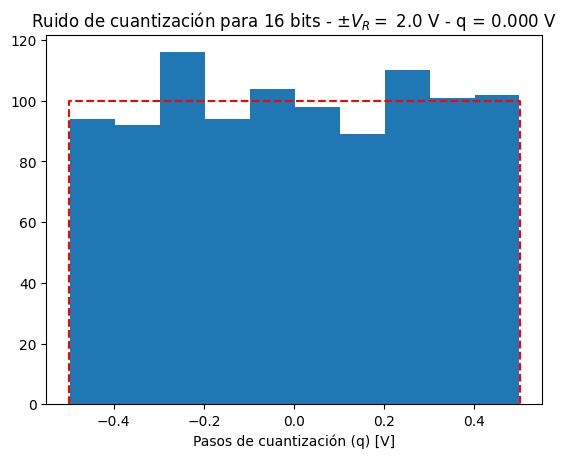

In [44]:
#############
# señal temporal
#############

plt.figure(1)

#Grafico de la señal sin ruido
plt.plot(tt, analog_sig, lw=1,linestyle='-', color ="red", label='$ s $ = señal analogica' )
# Gráfico de señal cuantizada con ruido
plt.plot(tt, srq, lw=2, linestyle='-', color='blue', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label=' $ srq $ = señal cuantizada')
# Gráfico de señal analógica con ruido
plt.plot(tt, sr, lw=1, color='black', marker='x', linestyle='dotted', markersize=2, markerfacecolor='red', markeredgecolor='black', fillstyle='none', label='$ sr $ =  señal analogica con ruido')

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

###########
# Espectro
###########
plt.figure(2)
ft_SR = 1/N*np.fft.fft( sr)
ft_Srq = 1/N*np.fft.fft( srq)
ft_As = 1/N*np.fft.fft( analog_sig)
ft_Nq = 1/N*np.fft.fft( nq)
ft_Nn = 1/N*np.fft.fft( nn)

# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)

bfrec = ff <= fs/2

Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

plt.figure(10)

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$ s $ (sig.)' ) #El puntero se usa para quedarnos con la mitad del vector (por paridad no necesitamos mas)
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 0.5  )

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()

#############
# Histograma
#############

plt.figure(3)
bins = 10
plt.hist(nq.flatten()/(q), bins=bins)
plt.plot( np.array([-1/2, -1/2, 1/2, 1/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))
plt.xlabel('Pasos de cuantización (q) [V]');

## Análisis y conclusiónes

Sabemos que la cantidad de bits $B$ determina la cantidad de pasos de cuantización del ADC, por lo que cuanto mas grande sea $B$ el paso de cuantización $q$ será mas chico, teniendo un menor ruido de cuantización. Gráficamente esperamos ver un menor ruido de cuantización para $B = 16$ que para $B = 4$, ya que tenemos una mayor resolución espectral. 

Por otro lado, en nuestro caso, la variación del $K_n$ afecta directamente a la potencia del ruido analógico. Al tener un ruido analógico en nuestra señal de entrada alto, este tiene mas impacto que el ruido de cuantización, moviendo el piso de ruido. No así cuando es menor que el ruido de cuantización. Por lo que esperamos entonces que este tenga mas peso en el caso de $B = 16$ con $K_n = 10$ que el caso de $B = 4$ con $ K_n = \frac{1}{10}$ ya que este es bastante cercano a 0, analicemos los gráficos para ver que resulto experimentalmente. 

### $B = 4$ con $ K_n = \frac{1}{10}$

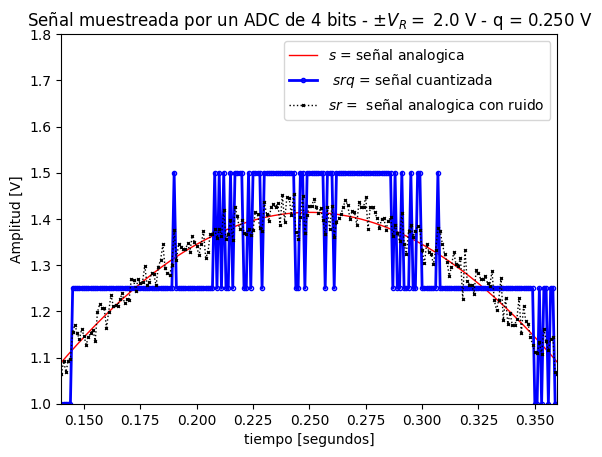

In [45]:
#%%Datos para el sampleo
fs =  1000 # frecuencia de muestreo (Hz)
N = 1000 # cantidad de muestras
# con 1000 para cada una normalizamos la resolucion espectral

# Datos del ADC
B = 4 # bits (los elegimos entre todos)
Vf = 2 # rango simétrico de +/- Vf Volts 
q = 2*Vf/(2**B)# paso de cuantización de q Volts

# datos del ruido (potencia de la señal normalizada, es decir 1 W)
pot_ruido_cuant = (q**2)/12 # Watts 
kn = 1/10. # escala de la potencia de ruido analógico
pot_ruido_analog = pot_ruido_cuant * kn 

ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

#%%

tt, xx = mi_funcion_sen(2, 0, 1, 0, N, fs)

##normalizar para que la potencia sea 1
##con desvio estandar:
xn = xx/np.std(xx) #varianza unitaria con potencia = 1

nn=np.random.normal(0,np.sqrt(pot_ruido_analog),N) #señal de ruido analogico

#%% Generacion de ruido

analog_sig = xn # señal analógica sin ruido

sr = xn+nn # señal analógica de entrada al ADC (con ruido analógico)

srq = np.round(sr/q)*q# señal cuantizada, (señal divida la cantidad total de bits)

nq =  srq-sr# señal de ruido de cuantización

#%% Analisis mas preciso

plt.figure(4)


#Grafico de la señal sin ruido
plt.plot(tt, analog_sig, lw=1,linestyle='-', color ="red", label='$ s $ = señal analogica' )
# Gráfico de señal cuantizada con ruido
plt.plot(tt, srq, lw=2, linestyle='-', color='blue', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label=' $ srq $ = señal cuantizada')
# Gráfico de señal analógica con ruido
plt.plot(tt, sr, lw=1, color='black', marker='x', linestyle='dotted', markersize=2, markerfacecolor='red', markeredgecolor='black', fillstyle='none', label='$ sr $ =  señal analogica con ruido')


plt.xlim(0.140,0.360)
plt.ylim(1,1.8)
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()


### $B = 16$ con $ K_n = 10$

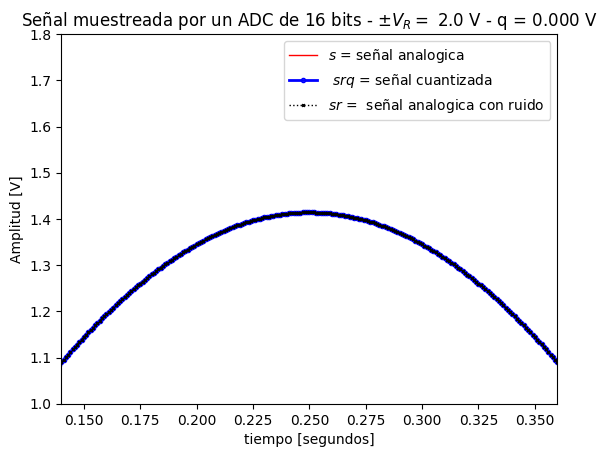

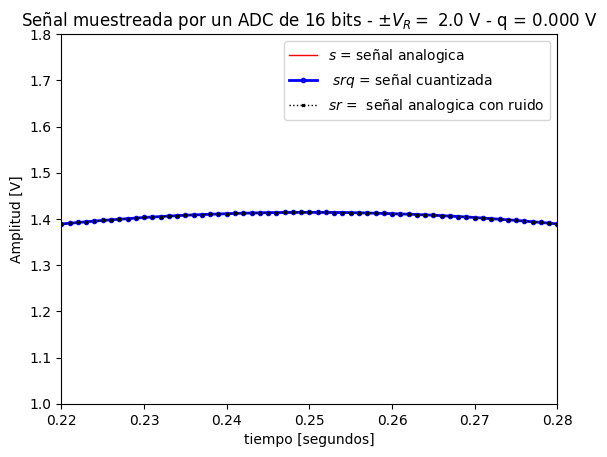

In [46]:
#%%Datos para el sampleo
fs =  1000 # frecuencia de muestreo (Hz)
N = 1000 # cantidad de muestras
# con 1000 para cada una normalizamos la resolucion espectral

# Datos del ADC
B = 16 # bits (los elegimos entre todos)
Vf = 2 # rango simétrico de +/- Vf Volts 
q = 2*Vf/(2**B)# paso de cuantización de q Volts

# datos del ruido (potencia de la señal normalizada, es decir 1 W)
pot_ruido_cuant = (q**2)/12 # Watts 
kn = 10. # escala de la potencia de ruido analógico
pot_ruido_analog = pot_ruido_cuant * kn 

ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

#%%

tt, xx = mi_funcion_sen(2, 0, 1, 0, N, fs)

##normalizar para que la potencia sea 1
##con desvio estandar:
xn = xx/np.std(xx) #varianza unitaria con potencia = 1

nn=np.random.normal(0,np.sqrt(pot_ruido_analog),N) #señal de ruido analogico

#%% Generacion de ruido

analog_sig = xn # señal analógica sin ruido

sr = xn+nn # señal analógica de entrada al ADC (con ruido analógico)

srq = np.round(sr/q)*q# señal cuantizada, (señal divida la cantidad total de bits)

nq =  srq-sr# señal de ruido de cuantización

#%% Analisis mas preciso

plt.figure(4)


#Grafico de la señal sin ruido
plt.plot(tt, analog_sig, lw=1,linestyle='-', color ="red", label='$ s $ = señal analogica' )
# Gráfico de señal cuantizada con ruido
plt.plot(tt, srq, lw=2, linestyle='-', color='blue', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label=' $ srq $ = señal cuantizada')
# Gráfico de señal analógica con ruido
plt.plot(tt, sr, lw=1, color='black', marker='x', linestyle='dotted', markersize=2, markerfacecolor='red', markeredgecolor='black', fillstyle='none', label='$ sr $ =  señal analogica con ruido')


plt.xlim(0.140,0.360)
plt.ylim(1,1.8)
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

#Grafico de la señal sin ruido
plt.plot(tt, analog_sig, lw=1,linestyle='-', color ="red", label='$ s $ = señal analogica' )
# Gráfico de señal cuantizada con ruido
plt.plot(tt, srq, lw=2, linestyle='-', color='blue', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label=' $ srq $ = señal cuantizada')
# Gráfico de señal analógica con ruido
plt.plot(tt, sr, lw=1, color='black', marker='x', linestyle='dotted', markersize=2, markerfacecolor='red', markeredgecolor='black', fillstyle='none', label='$ sr $ =  señal analogica con ruido')

plt.xlim(0.220, 0.280)
plt.ylim(1,1.8)
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()


Podemos ver que, contrario a como habiamos pensado en un inicio, en el caso del ADC de 16 bits, evaluando un intervalo de tiempo realmente pequeño, al ser el paso de cuantización tan pequeño la variación entre la señal analogica y su cuantización es imperceptible, incluso teniendo una potencia de ruido analógica relativamente grande. A diferencia del ADC de 4 bits, en el cual el ruido de cuantización es bastante mas significativo. Esto nos permite ver la importancia de un paso de cuantización chico, volviendo el ruido analógico y el ruido de cuantización casi imperceptibles, siendo este sampleo entonces realmente fiel a la señal analogica de entrada.  